In [62]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from enum import StrEnum

plt.rcdefaults()
plt.rc('axes.formatter', use_mathtext=True)
plt.rc('figure', dpi=200)
font = {
    'family' : 'serif',
    'size'   : 12,
    'serif':  'cmr10'
}
plt.rc('font', **font)

In [ ]:
# /mnt/c/Users/Duchess\ Oche/Desktop/

In [63]:
# colors
class color(StrEnum):
    LeNet = "green"
    AlexNet = "blue"
    AlexNetVIB = "black"
    AlexNetMCDO = "red"
    CustomNet = "orange"
    VGG = "dodgerblue"
    ResNet = "saddlebrown"

    @classmethod
    def from_model_name(cls, model_name):
        return cls[model_name].value

In [64]:
train_path = "/workspace/result/train"
model_paths = os.listdir(train_path)
model_path_stg = {}
for model_path in model_paths:
    model_path_stg[model_path] = glob.glob(f"{train_path}/{model_path}/**data**/**.csv", recursive=True)


In [65]:
dfs = {} 
for model, path in model_path_stg.items():
    dfs[model] = [pd.read_csv(filename, index_col=None, header=0) for filename in model_path_stg[model]]

In [66]:
cc_mean = np.mean([df["Train Accuracy"].values for df in dfs["CustomNet"]], axis=0)
cc_mean

array([23.354, 38.348, 45.366, 49.518, 52.874, 55.788, 58.522, 60.746,
       62.886, 64.47 , 66.088, 67.666, 68.886, 70.272, 71.394, 72.398,
       73.262, 74.19 , 74.996, 75.97 , 76.634, 77.398, 78.076, 78.654,
       79.206, 79.86 , 80.504, 80.99 , 81.592, 82.1  , 82.452, 82.92 ,
       83.492, 84.008, 84.552, 84.91 , 85.306, 85.762, 86.05 , 86.61 ,
       87.018, 87.282, 87.726, 88.08 , 88.466, 88.766, 89.182, 89.404,
       89.88 , 90.118, 90.38 , 90.75 , 90.97 , 91.268, 91.634, 91.814,
       92.086, 92.354, 92.6  , 92.742, 93.036, 93.214, 93.408, 93.572,
       93.74 , 94.074, 94.174, 94.254, 94.432, 94.718, 94.92 , 94.928,
       95.108, 95.266, 95.462, 95.516, 95.62 , 95.844, 95.826, 95.926,
       96.018, 96.1  , 96.288, 96.356, 96.474, 96.592, 96.612, 96.702,
       96.756, 96.828, 96.896, 96.974, 97.054, 97.12 , 97.106, 97.222,
       97.324, 97.388, 97.362, 97.396])

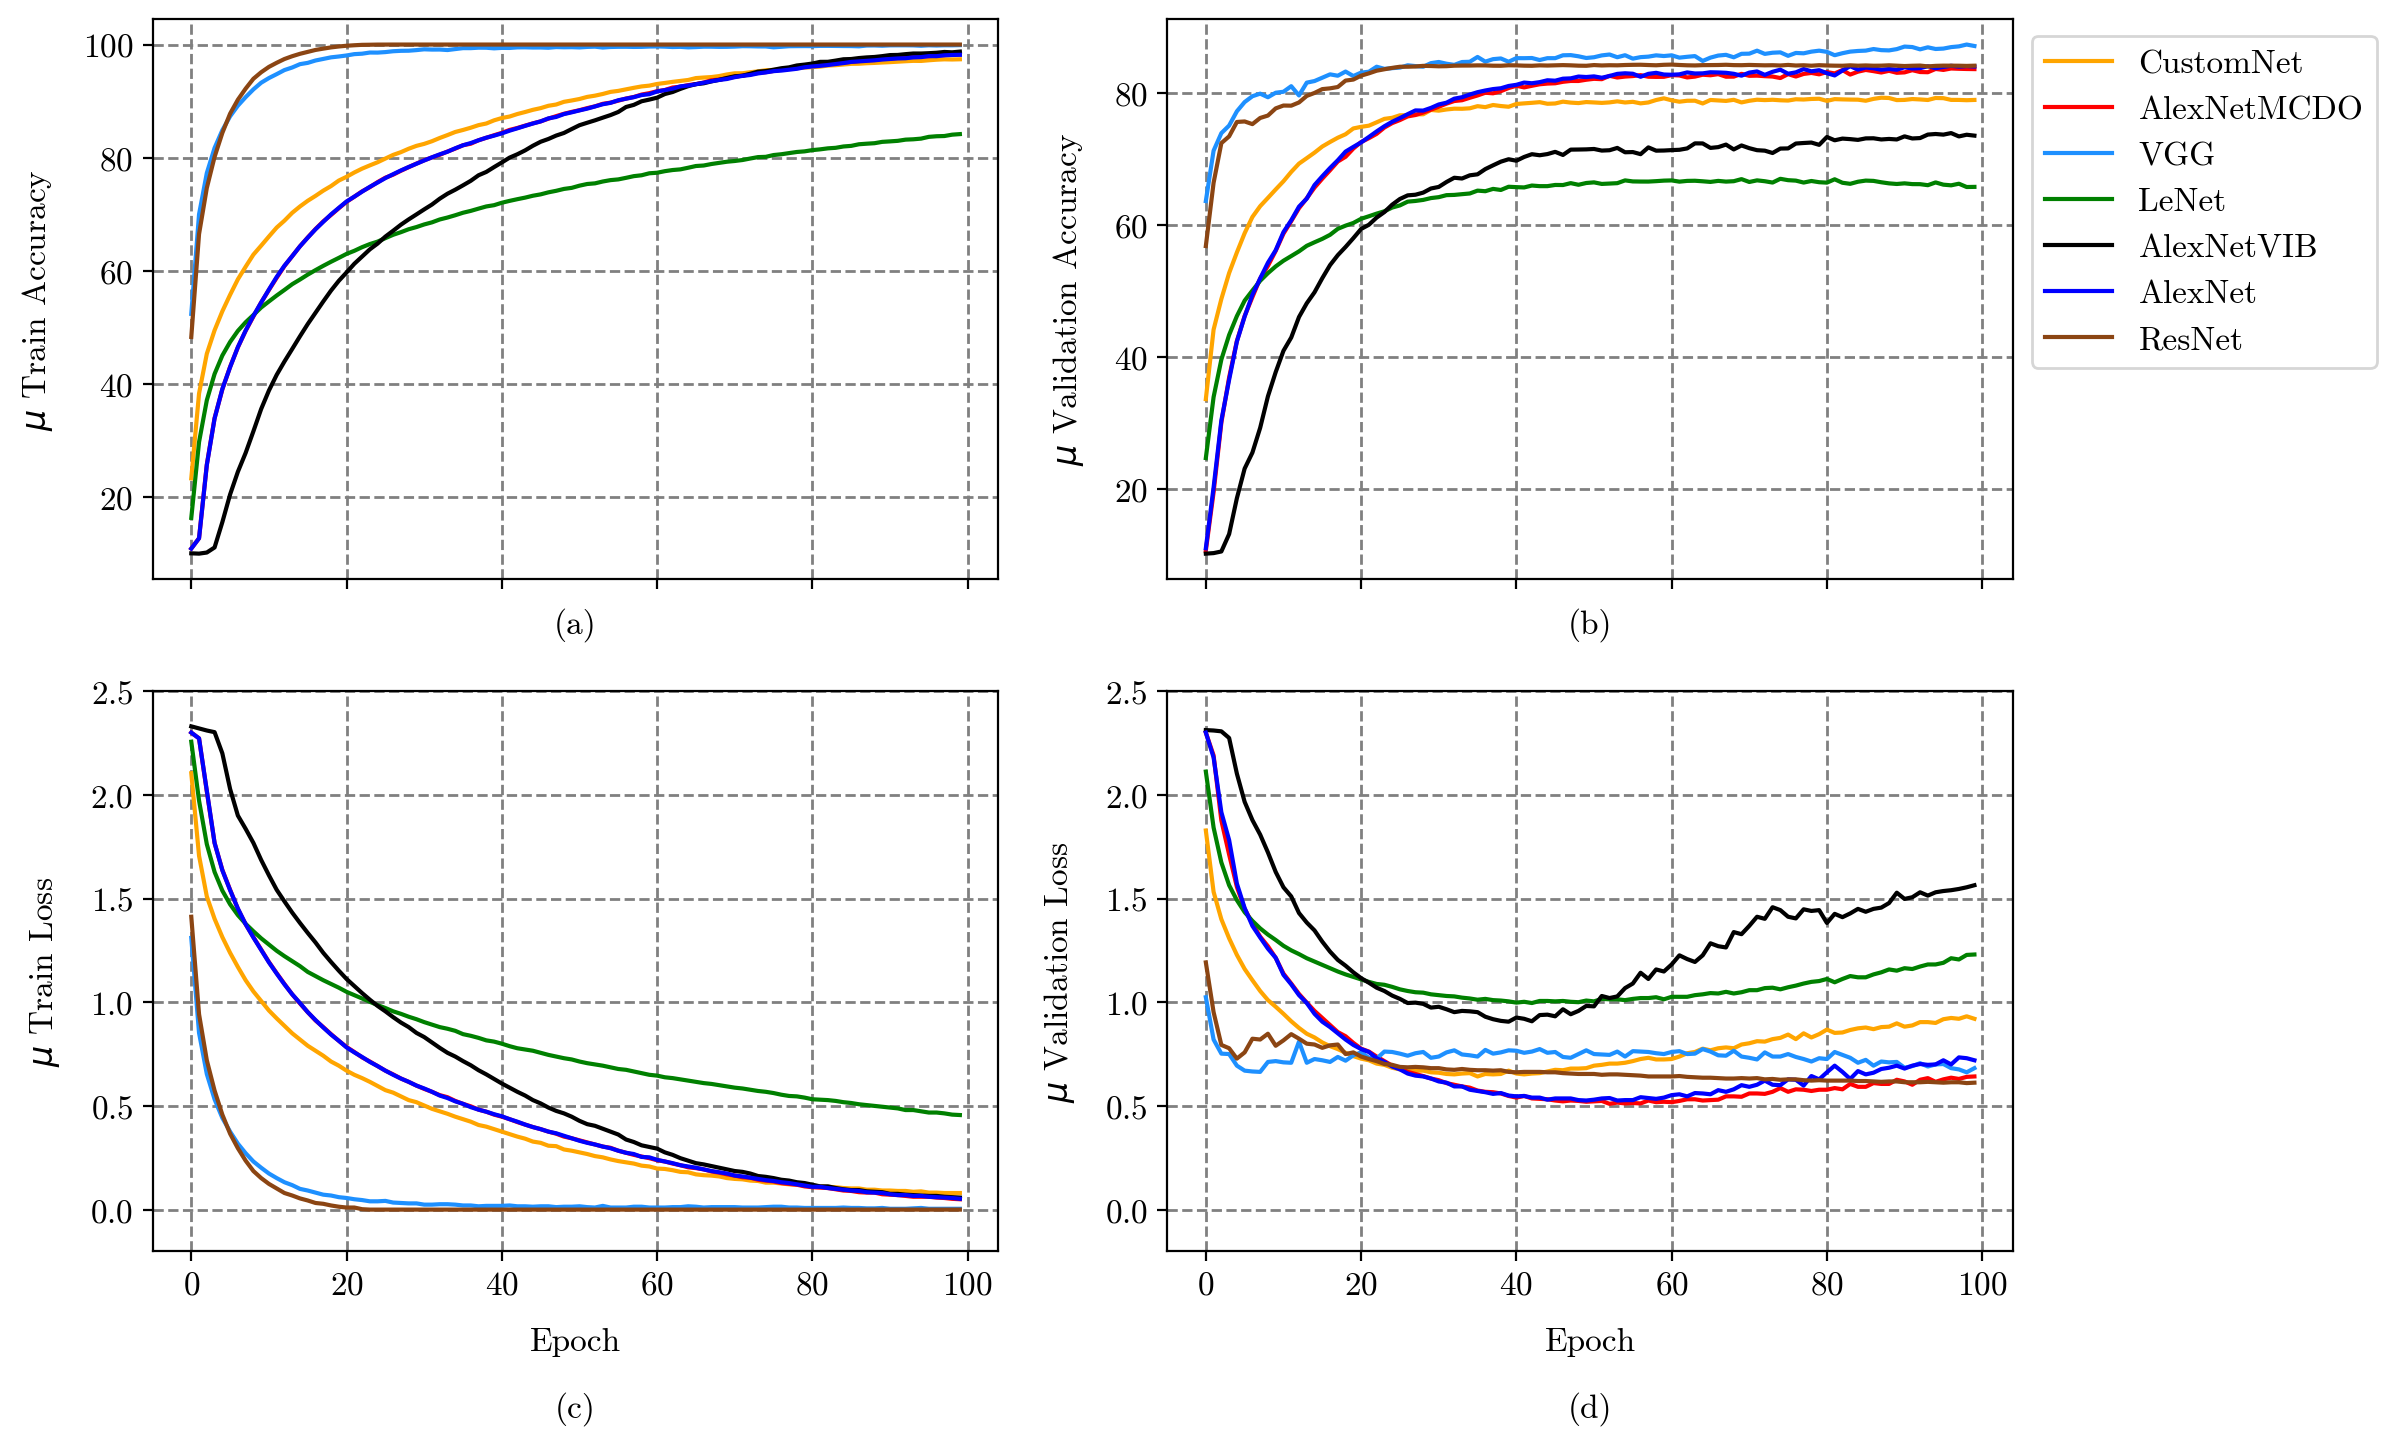

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8), sharex=True)
axes = axes.flatten()

cols = ["Train Accuracy", "Validation Accuracy", "Train Loss", "Validation Loss"]
labels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)" ]


for idx, col in enumerate(cols):
    ax = axes[idx]
    for model_name, df_s in dfs.items():
        df_mean = np.mean([df[col].values for df in df_s], axis=0)

        ax.plot(range(len(df_mean)), df_mean, color.from_model_name(model_name), label=model_name)

    ax.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)  # Dashed grid
    # ax.minorticks_on()  # Enable minor ticks
    # ax.grid(True, which='minor', linestyle='--', linewidth=0.5)  # Minor grid lines with dotted style

    if idx > 1:
        ax.set_xlabel("Epoch", fontsize=12, labelpad=10)
        ax.text(0.5, -0.25, labels[idx], transform=ax.transAxes, fontsize=12, fontweight='bold',  ha='center', va='top')
        ax.set_ylim([-0.2, 2.5])
    else:
        ax.text(0.5, -0.05, labels[idx], transform=ax.transAxes, fontsize=12, fontweight='bold',  ha='center', va='top')
    ax.set_ylabel(fr"$\mu$ {col}", fontsize=12, labelpad=10)
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel("Epoch", fontsize=12, labelpad=10)
plt.legend(loc='best', bbox_to_anchor=(1.45, 2.2))

plt.savefig("/workspace/images/train_eval.svg")
plt.show()


# Single Data analysis

In [24]:
lenet_df = pd.read_csv(f"{train_path}/LeNet/data-18-01-2025/LeNet_train_eval_42.csv")
alexnetvib_df = pd.read_csv(f"{train_path}/AlexNetVIB/data-18-01-2025/AlexNetVIB_train_eval_42.csv")
alexnet_df = pd.read_csv(f"{train_path}/AlexNet/data-18-01-2025/AlexNet_train_eval_42.csv")
alexnetmcdo_df = pd.read_csv(f"{train_path}/AlexNetMCDO/data-18-01-2025/AlexNetMCDO_train_eval_42.csv")
customnet_df = pd.read_csv(f"{train_path}/CustomNet/data-19-01-2025/CustomNet_train_eval_42.csv")
vgg_df = pd.read_csv(f"{train_path}/VGG/data-18-01-2025/VGG_train_eval_42.csv")
resnet_df = pd.read_csv(f"{train_path}/ResNet/data-18-01-2025/ResNet_train_eval_42.csv")

In [ ]:
lenet_df.head()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(alexnet_df.index, alexnet_df["Validation Accuracy"], color.AlexNet, label=f'AlexNet Mean ± Std')
plt.plot(alexnetvib_df.index, alexnetvib_df["Validation Accuracy"], color=color.AlexetVIB, label=f'AlexNetVIB Mean ± Std')
plt.plot(alexnetmcdo_df.index, alexnetmcdo_df["Validation Accuracy"], color=color.AlexNetMCDO, label=f'AlexNetMCDO Mean ± Std')
plt.plot(lenet_df.index, lenet_df["Validation Accuracy"], color=color.LeNet, label=f'LeNet Mean ± Std')
plt.plot(vgg_df.index, vgg_df["Validation Accuracy"], color=color.VGG, label=f'VGG Mean ± Std')
plt.plot(resnet_df.index, resnet_df["Validation Accuracy"], color=color.ResNet, label=f'ResNet Mean ± Std')
plt.plot(customnet_df.index, customnet_df["Validation Accuracy"], color=color.CustomNet, label=f'CustomNet Mean ± Std')

plt.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)  # Dashed grid
plt.minorticks_on()  # Enable minor ticks
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)  # Minor grid lines with dotted style

# plt.errorbar(alexnet_df.index, alexnet_df["Validation Accuracy"], yerr=alexnet_df["Top 1 Error"], fmt='.', capsize=5, label=f'AlexNet Mean ± Std')
# plt.errorbar(alexnetvib_df.index, alexnetvib_df["Validation Accuracy"], yerr=alexnetvib_df["Top 1 Error"], fmt='.', capsize=5, label=f'AlexNetVIB Mean ± Std')
plt.legend()
plt.show()

In [ ]:
plt.plot(lenet_df.index, lenet_df["Train Accuracy"])
plt.plot(lenet_df.index, lenet_df["Validation Accuracy"])
plt.show()

In [ ]:
# Model Confidence
sns.kdeplot(x=lenet_df["Model Confidence"], label="LeNet", fill=True)
sns.kdeplot(x=alexnetvib_df["Model Confidence"], label="AlexNetVIB", fill=True)
sns.kdeplot(x=alexnet_df["Model Confidence"], label="AlexNet", fill=True)
sns.kdeplot(x=alexnetmcdo_df["Model Confidence"], label="AlexNetMCDO", fill=True)
sns.kdeplot(x=vgg_df["Model Confidence"], label="VGG", fill=True)
sns.kdeplot(x=resnet_df["Model Confidence"], label="ResNet", fill=True)
plt.legend()
plt.show()

In [ ]:
# Entropy
sns.kdeplot(x=lenet_df["Entropy Reduction"], label="LeNet", fill=True)
sns.kdeplot(x=alexnetvib_df["Entropy Reduction"], label="AlexNetVIB", fill=True)
sns.kdeplot(x=alexnet_df["Entropy Reduction"], label="AlexNet", fill=True)
sns.kdeplot(x=alexnetmcdo_df["Entropy Reduction"], label="AlexNetMCDO", fill=True)
sns.kdeplot(x=customnet_df["Entropy Reduction"], label="CustomNet", fill=True)
# sns.kdeplot(x=vgg_df["Entropy Reduction"], label="VGG", fill=True)
# sns.kdeplot(x=resnet_df["Entropy Reduction"], label="ResNet", fill=True)
plt.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)  # Dashed grid
plt.minorticks_on()  # Enable minor ticks
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)  # Minor grid lines with dotted style
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(alexnet_df.index, alexnet_df["Top 1 Error"], color.AlexNet, label=f'AlexNet Mean ± Std')
plt.plot(alexnetvib_df.index, alexnetvib_df["Top 1 Error"], color=color.AlexetVIB, label=f'AlexNetVIB Mean ± Std')
plt.plot(alexnetmcdo_df.index, alexnetmcdo_df["Top 1 Error"], color=color.AlexNetMCDO, label=f'AlexNetMCDO Mean ± Std')
plt.plot(lenet_df.index, lenet_df["Top 1 Error"], color=color.LeNet, label=f'LeNet Mean ± Std')
plt.plot(vgg_df.index, vgg_df["Top 1 Error"], color=color.VGG, label=f'VGG Mean ± Std')
plt.plot(resnet_df.index, resnet_df["Top 1 Error"], color=color.ResNet, label=f'ResNet Mean ± Std')
plt.plot(customnet_df.index, customnet_df["Top 1 Error"], color=color.CustomNet, label=f'CustomNet Mean ± Std')

plt.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)  # Dashed grid
plt.minorticks_on()  # Enable minor ticks
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)  # Minor grid lines with dotted style

# plt.errorbar(alexnet_df.index, alexnet_df["Validation Accuracy"], yerr=alexnet_df["Top 1 Error"], fmt='.', capsize=5, label=f'AlexNet Mean ± Std')
# plt.errorbar(alexnetvib_df.index, alexnetvib_df["Validation Accuracy"], yerr=alexnetvib_df["Top 1 Error"], fmt='.', capsize=5, label=f'AlexNetVIB Mean ± Std')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(alexnet_df.index, alexnet_df["Top 5 Error"], color.AlexNet, label=f'AlexNet Mean ± Std')
plt.plot(alexnetvib_df.index, alexnetvib_df["Top 5 Error"], color=color.AlexetVIB, label=f'AlexNetVIB Mean ± Std')
plt.plot(alexnetmcdo_df.index, alexnetmcdo_df["Top 5 Error"], color=color.AlexNetMCDO, label=f'AlexNetMCDO Mean ± Std')
plt.plot(lenet_df.index, lenet_df["Top 5 Error"], color=color.LeNet, label=f'LeNet Mean ± Std')
plt.plot(vgg_df.index, vgg_df["Top 5 Error"], color=color.VGG, label=f'VGG Mean ± Std')
plt.plot(resnet_df.index, resnet_df["Top 5 Error"], color=color.ResNet, label=f'ResNet Mean ± Std')
plt.plot(customnet_df.index, customnet_df["Top 5 Error"], color=color.CustomNet, label=f'CustomNet Mean ± Std')

plt.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)  # Dashed grid
plt.minorticks_on()  # Enable minor ticks
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)  # Minor grid lines with dotted style

# plt.errorbar(alexnet_df.index, alexnet_df["Validation Accuracy"], yerr=alexnet_df["Top 1 Error"], fmt='.', capsize=5, label=f'AlexNet Mean ± Std')
# plt.errorbar(alexnetvib_df.index, alexnetvib_df["Validation Accuracy"], yerr=alexnetvib_df["Top 1 Error"], fmt='.', capsize=5, label=f'AlexNetVIB Mean ± Std')
plt.legend()
plt.show()

In [ ]:
x = lenet_df.index.values
y_train = lenet_df["Train Accuracy"].values
y_test = lenet_df["Validation Accuracy"].values
#some confidence interval
ci_train = 1.96 * np.std(y_train)/np.sqrt(len(x))
ci_test = 1.96 * np.std(y_test)/np.sqrt(len(x))
print("ci_train", ci_train)
print("ci_test", ci_test)

fig, ax = plt.subplots()
ax.plot(x,y_train)
ax.fill_between(x, (y_train-ci_train), (y_train+ci_train), color='b', alpha=.1)

ax.plot(x,y_test, color="g")
ax.fill_between(x, (y_test-ci_test), (y_test+ci_test), color='g', alpha=.1)

In [ ]:
x = alexnetvib_df.index.values
y_train = alexnetvib_df["Train Accuracy"].values
y_test = alexnetvib_df["Validation Accuracy"].values
#some confidence interval
ci_train = 1.96 * np.std(y_train)/np.sqrt(len(x))
ci_test = 1.96 * np.std(y_test)/np.sqrt(len(x))
print("ci_train", ci_train)
print("ci_test", ci_test)

fig, ax = plt.subplots()
ax.plot(x,y_train)
ax.fill_between(x, (y_train-ci_train), (y_train+ci_train), color='b', alpha=.1)

ax.plot(x,y_test, color="g")
ax.fill_between(x, (y_test-ci_test), (y_test+ci_test), color='g', alpha=.1)

In [ ]:
x = vgg_df.index.values
y_train = vgg_df["Train Accuracy"].values
y_test = vgg_df["Validation Accuracy"].values
#some confidence interval
ci_train = 1.96 * np.std(y_train)/np.sqrt(len(x))
ci_test = 1.96 * np.std(y_test)/np.sqrt(len(x))
print("ci_train", ci_train)
print("ci_test", ci_test)

fig, ax = plt.subplots()
ax.plot(x,y_train)
ax.fill_between(x, (y_train-ci_train), (y_train+ci_train), color='b', alpha=.1)

ax.plot(x,y_test, color="g")
ax.fill_between(x, (y_test-ci_test), (y_test+ci_test), color='g', alpha=.1)

In [ ]:
x = alexnetmcdo_df.index.values
y_train = alexnetmcdo_df["Train Accuracy"].values
y_test = alexnetmcdo_df["Validation Accuracy"].values
#some confidence interval
ci_train = 1.96 * np.std(y_train)/np.sqrt(len(x))
ci_test = 1.96 * np.std(y_test)/np.sqrt(len(x))
print("ci_train", ci_train)
print("ci_test", ci_test)

fig, ax = plt.subplots()
ax.plot(x,y_train)
ax.fill_between(x, (y_train-ci_train), (y_train+ci_train), color='b', alpha=.1)

ax.plot(x,y_test, color="g")
ax.fill_between(x, (y_test-ci_test), (y_test+ci_test), color='g', alpha=.1)

In [ ]:

colors = ["green", "blue", "red", "orange", "purple", "cyan", "magenta"]

for i, color in enumerate(colors):
    plt.bar(i, 1, color=color)

plt.show()

In [ ]:
# Sample Data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create 5 subplots in a row
fig, axes = plt.subplots(1, 5, figsize=(15, 4), sharey=True)

# Labels for subplots
labels = ["(a)", "(b)", "(c)", "(d)", "(e)"]

# Loop through axes and customize each subplot
for i, ax in enumerate(axes):
    ax.plot(x, y + i * 0.2)  # Example plot
    ax.set_xlabel("Accuracy", fontsize=12, labelpad=10)  # Increase spacing for x-axis label

    # Add title BELOW the x-axis with extra spacing
    ax.text(0.5, -0.35, labels[i], transform=ax.transAxes, 
            fontsize=12, fontweight='bold', ha='center', va='top')
# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Add bottom margin
plt.show()

In [ ]:
# Sample Data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create 5 subplots in a row with a shared y-axis
fig, axes = plt.subplots(1, 5, figsize=(15, 4), sharey=True)

# Labels for subplots
labels = ["(a)", "(b)", "(c)", "(d)", "(e)"]

# Loop through axes and customize each subplot
for i, ax in enumerate(axes):
    ax.plot(x, y + i * 0.2)  # Example plot
    ax.set_xlabel("Accuracy", fontsize=12, labelpad=10)  # Set x-axis label
    ax.text(0.5, -0.35, labels[i], transform=ax.transAxes, 
            fontsize=14, fontweight='bold', ha='center', va='top')  # Title below x-axis

# Add shared y-axis label
fig.text(0.04, 0.5, "Validation Accuracy", fontsize=14, va="center", rotation=90)

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0.08, 0.1, 1, 1])  # Left margin for y-label
plt.show()

In [ ]:
sns.lineplot(data=lenet_df, x=lenet_df.index, y=lenet_df["Train Accuracy"], hue="Top 1 Error", markers=True, dashes=True)

In [ ]:
model_path_stg.keys()

In [ ]:
plt.figure(figsize=(10,6))
# plt.errorbar(range(len(cc_mean)), cc_mean, yerr=cc_std, fmt='o', capsize=5, label='Mean ± Std')
for model, data in dfs.items():

    cc_std = np.std([train_acc["Test Accuracy"].values for train_acc in data], axis=0)
    cc_mean = np.mean([train_acc["Test Accuracy"].values for train_acc in data], axis=0)
    plt.errorbar(range(len(cc_mean)), cc_mean, yerr=cc_std, fmt='.', capsize=5, label=f'{model} Mean ± Std') 

# Customize plot
plt.xlabel("Category")
plt.ylabel("Value")
plt.title("Mean with Standard Deviation Error Bars")
plt.legend()
plt.grid(True)

# Show plot
plt.show()